<a href="https://colab.research.google.com/github/Lilly-yang/UCA--Machine_Learning_and_Computer_Vision/blob/main/Project_Automatic_Signal_Detector_9_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Main code

Only part for data file generation is new.

I didn't find a fit model for this train data. Sorry.

## import

In [ ]:
from keras.models import Model, Sequential
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
import glob, cv2, os, keras, random
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D
import tensorflow as tf

%matplotlib inline

### Data preprocessing


In [ ]:
vgg_model = VGG19(weights='imagenet') # Load VGG model and weights
model.summary()

model = Model(inputs=vgg_model.input, outputs=[vgg_model.get_layer("fc2").output]) # Get the fc2 layer instead of the prediction layer trained for ImageNet
model.summary() # See our model


# output_feats = model.predict(X) # Extract features of our images. Size = (nb_images, 4096)

574717952/574710816 [==============================] - 15s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fu_1 (Dense)                 (None, 512)               2097664   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
fu_2 (Dense)                 (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
fu_3 (Dense)                 (None, 25)                6425      
Total params: 2,235,417
Trainable params: 2,235,417
Non-trainable params: 0
_________________________________________________________________


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


original img: (487, 224, 224, 3)
festures: (487, 4096)


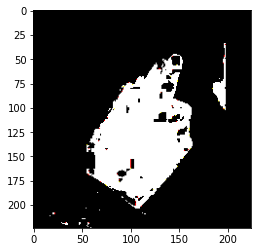

In [ ]:
print('original img:', np.shape(X))#, plt.imshow(X[1]))
plt.imshow(X[1])
print('festures:', np.shape(output_feats))#, output_feats)
# plt.imshow(output_feats[1])

### transfor 224x224 data to 4096x1 by VGG
only this part is new.

In [ ]:

dataset_file_path = '/content/drive/My Drive/MLCV/dataset_VGG.txt'
path_to_images = "/content/drive/My Drive/MLCV/train_val_224x224"

f = open(dataset_file_path, "a")

for inx, file_name in enumerate(os.listdir(path_to_images)):
  ## Read image
  # I = Image.open(os.path.join(path, file_name))
  img = image.load_img(image_path)
  img = image.img_to_array(img)
  img = preprocess_input(img)
  img = np.reshape(img, (1,224,224,3))

  ## Resize (16,16) image to (1,256)
  # I_arr = np.array(I)
  # I_arr = np.resize(I_arr, (1,256)) 

  ## extract the image features from the pre-trained network VGG
  output_feats = model.predict(img)

  ## Reform image to str: W,1,1,226,...,1
  I_str = [str(i) for i in list(output_feats[0])]
  I_str = ','.join(I_str) 
  data_temp = file_name[0]+','+I_str

  ## Show progress
  if not inx%50:
    print('%d / %d \n %s'%(inx, len(os.listdir(path_to_images)), data_temp))

  ## Write alphabet and pixeles in to .txt file   
  f.write(data_temp+'\n')

f.close()

0 / 487 
 Y,0.0,1.4980062,0.0,0.0,2.0397606,1.2013656,2.7272964,0.0,0.0,1.9315263,0.0,0.0,0.0,0.42325068,0.37619781,0.0,0.0,0.0,0.0,0.0,1.2312319,0.0,0.41098565,0.29185134,0.0,0.0,2.4433513,1.5877647,0.0,0.0,0.0,1.4307044,0.0,0.0,0.0,0.38101754,0.0,0.0,0.0,0.0,1.0166032,0.0,2.4894226,0.0,0.0,0.0,0.0,1.5297284,0.0,0.6455034,0.14896983,0.0,0.0,0.0,0.0,3.0144014,0.6224148,1.2723937,1.0530216,0.57201934,0.0,0.0,0.0,0.0,0.0,0.0,0.29343542,0.029635787,0.0,0.0677768,0.0,0.0,0.0,0.0,0.0,0.120854944,1.6745872,0.43998528,0.0,2.3698962,0.0,0.45758685,0.0,0.86960995,0.0,0.06835568,0.0,0.0,0.5854939,1.351382,0.6034965,0.0,0.0,0.0,1.9948626,0.0,3.6825323,0.0,0.10696253,2.311274,0.0,0.8520546,0.08640769,1.3350482,0.0,0.0,0.36080056,2.6036708,1.6449628,0.0,3.4437845,0.0,4.510195,0.0,0.0,0.0,0.0,0.0,0.0,0.21023458,2.3947604,0.83419734,0.3719202,0.0,0.5492227,0.0,0.0,0.0,2.3476102,0.0,1.9980382,2.5028605,0.23585668,2.616244,0.0,0.0,2.855742,0.0,0.17319077,0.85373724,0.0,1.20821,0.0,0.0,2.580665,0.0,0.54

In [ ]:
lines = open(dataset_file_path).readlines()
random.shuffle(lines)
open(dataset_file_path, 'w').writelines(lines)

### load data

In [ ]:
dataset_file_path = '/content/drive/My Drive/MLCV/dataset_VGG.txt'

def load_dataset(dataset_file_path):
    a = np.loadtxt(dataset_file_path, delimiter=',', converters={ 0 : lambda ch : ord(ch)-ord('A') })
    samples, letters = a[:,1:], a[:,0]
    return samples, letters

samples, letters = load_dataset(dataset_file_path)
print(np.shape(samples), samples[:3])
print(np.shape(letters), letters[:10])

(487, 4096) [[0.        1.4980062 0.        ... 1.1404982 0.        0.       ]
 [0.        1.4980062 0.        ... 1.1404982 0.        0.       ]
 [0.        1.4980062 0.        ... 1.1404982 0.        0.       ]]
(487,) [23. 24. 23. 11. 11.  8.  8.  8. 24.  5.]


In [ ]:
train_ratio = 0.7
n_train_samples = int(len(samples) * train_ratio)
x_train, y_train = samples[:n_train_samples], letters[:n_train_samples]
x_val, y_val = samples[n_train_samples:], letters[n_train_samples:]

In [ ]:
## the biggest value of label is 'Y' = 24, so the num_classes should be 25(include 0)
num_classes = 25

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

## 0-1 normolazition
x_train /= 255
x_val /= 255
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')

## convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

340 train samples
147 test samples


### train model

In [ ]:
epochs = 2000

## model-sequential
model = Sequential()
# model.add(Dense(1024, activation='relu', input_shape=(4096,), name = "fu_1"))
# # model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu', ))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu', name = "fu_2"))
# model.add(Dropout(0.25))
model.add(Dense(128, activation='relu',input_shape=(4096,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.125))
model.add(Dense(num_classes, activation='softmax', name = "fu_3"))

## print model formate
model.summary()

## set optimizer, especially the learn rate
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = keras.optimizers.SGD(lr=0.01)
## compile model

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               524416    
_________________________________________________________________
dropout_59 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_60 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_61 (Dropout)         (None, 32)                0         
_________________________________________________________________
fu_3 (Dense)                 (None, 25)              

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, verbose=1, validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

340/340 [==============================] - 0s 139us/step - loss: 1.7862 - accuracy: 0.1765 - val_loss: 1.7828 - val_accuracy: 0.1837
Epoch 424/2000
340/340 [==============================] - 0s 136us/step - loss: 1.7882 - accuracy: 0.1676 - val_loss: 1.7803 - val_accuracy: 0.1973
Epoch 425/2000
340/340 [==============================] - 0s 136us/step - loss: 1.7842 - accuracy: 0.1676 - val_loss: 1.7903 - val_accuracy: 0.1837
Epoch 426/2000
340/340 [==============================] - 0s 161us/step - loss: 1.7877 - accuracy: 0.1941 - val_loss: 1.7978 - val_accuracy: 0.1973
Epoch 427/2000
340/340 [==============================] - 0s 145us/step - loss: 1.7907 - accuracy: 0.1529 - val_loss: 1.7946 - val_accuracy: 0.1973
Epoch 428/2000
340/340 [==============================] - 0s 131us/step - loss: 1.7832 - accuracy: 0.1735 - val_loss: 1.7814 - val_accuracy: 0.1973
Epoch 429/2000
340/340 [==============================] - 0s 136us/step - loss: 1.7897 - accuracy: 0.1559 - val_loss: 1.7803 - 

KeyboardInterrupt: ignored